<a href="https://colab.research.google.com/github/jmaguial/pcmlai_capstone/blob/main/PCMLAI_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Specify the path to the folder containing .dta files
path = 'nsch_topical_data_2016_2022/'  # Replace with the actual folder path

# Use glob to get all the .dta file paths in the folder
all_files = glob.glob(path + "*.dta")

# Initialize an empty list to store DataFrames
dfs = []

# Loop over the list of .dta files and read them into DataFrames
for filename in all_files:
    df_aux = pd.read_stata(filename)
    dfs.append(df_aux)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()


,fipsst,stratum,hhid,formtype,totkids_r,tenure,hhlanguage,sc_age_years,sc_sex,k2q35a_1_years,...,planfuture,expulsion,a1_grade_i,family,hhsize_i,hhsize_if,mold,pesticide,a2_if,cystfib_desc
0,48,1,22000005,T1,2,3.0,1.0,5,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,1,22000021,T2,1,1.0,1.0,8,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2A,22000034,T1,3,2.0,1.0,5,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,1,22000037,T2,2,3.0,1.0,6,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,1,22000053,T3,1,2.0,1.0,17,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Display the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279546 entries, 0 to 279545
Columns: 551 entries, fipsst to cystfib_desc
dtypes: float64(515), int16(7), int32(1), int8(21), object(7)
memory usage: 1.1+ GB


In [11]:
# Get unique values in the 'Category' column
unique_values = df['k2q31a'].unique()

# Display the unique values
print(unique_values)

[ 2.  1. nan]


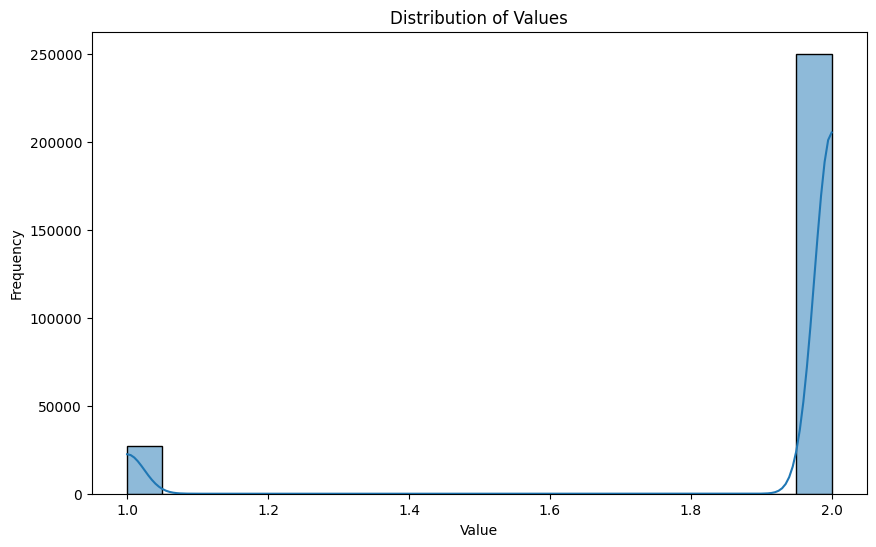

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['k2q31a'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [14]:
null_values_count = df['k2q31a'].isnull().sum()
print(null_values_count)

1881


In [17]:
df = df.rename(columns={'k2q31a':'y'})

In [18]:
df = df.dropna(subset=['y'])

In [20]:
columns_to_remove = ['a1_active','a1_deplstat','a1_employed','a2_active','a2_deplstat','a2_employed','ace11','ace12','askquestion','askquestion2','autoimmune','autoimmune_desc','birth_mo','birth_yr','birth_yr_f','blood_screen','bmiclass','bodyimage','bounceaball','concussion','confirminjury','covidarrange','covidcheckups','cystfib_screen','directions','directions2','drawacircle','drawaface','drawaperson','ebtcards','engage_binge','engage_exercise','engage_fast','engage_interest','engage_noeat','engage_picky','engage_pills','engage_purg','engageconcern','evalfasd','everhomeless','eyecare1','eyecare2','eyecare3','eyecare4','fasd','fruit','genetic_screen','grades','groupofobjects','heart_born','height','homeevic','hospitalstay','inq_edu','inq_employ','inq_home','inq_income','inq_resseg','medhistory','missmortgage','mold','nameemotions','oneword','outdoorswkday','outdoorswkend','overweight','pesticide','placeslived','point','readonedigit','recevalfasd','samesound','sc_aian','sc_asian','sc_nhpi','seekcare','sharetoys','simpleaddition','ssi','ssidisability','sugardrink','tellstory','tenure','threewords','twowords','understand','understand2','vape','vegetables','videophone','videophonecovid','visionexamrec','waitforturn','weight']
df = df.drop(columns=columns_to_remove)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277665 entries, 0 to 279545
Columns: 456 entries, fipsst to cystfib_desc
dtypes: float64(426), int16(7), int32(1), int64(2), int8(20)
memory usage: 918.9 MB


In [23]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['stratum', 'formtype'], dtype='object')


In [28]:
# Get unique values in the 'Category' column
unique_values = df['stratum'].unique()

# Display the unique values
print(unique_values)

# Get unique values in the 'Category' column
unique_values = df['stratum'].unique()

# Display the unique values
print(unique_values)

['1' '2A' 1 2]


In [27]:
 df['formtype'] =  df['formtype'].replace({'T1':1,'T2':2,'T3':3})

In [29]:
 df['stratum'] =  df['stratum'].replace({'1':1,'2A':2})

In [31]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].median())

In [33]:
# List of columns to replace with their average
columns_to_average = ['fpl_i1', 'fpl_i2', 'fpl_i3', 'fpl_i4', 'fpl_i5', 'fpl_i6']

# Calculate the row-wise average of the selected columns
df['fpl'] = df[columns_to_average].mean(axis=1)


# Drop the temporary 'fpl' column (optional)
df.drop(columns=columns_to_average)

,fipsst,stratum,hhid,formtype,totkids_r,hhlanguage,sc_age_years,sc_sex,k2q35a_1_years,momage,...,k7q91_r,planfuture,expulsion,a1_grade_i,family,hhsize_i,hhsize_if,a2_if,cystfib_desc,fpl
0,48,1,22000005,1,2,1.0,5,1,4.0,42.0,...,3.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,240.5
1,48,1,22000021,2,1,1.0,8,2,4.0,24.0,...,3.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,50.0
2,17,2,22000034,1,3,1.0,5,2,4.0,29.0,...,3.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,50.0
3,39,1,22000037,2,2,1.0,6,2,4.0,23.0,...,3.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,200.0
4,28,1,22000053,3,1,1.0,17,1,4.0,38.0,...,3.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279541,23,1,17170714,2,3,1.0,9,2,4.0,31.0,...,2.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,400.0
279542,39,1,17170717,2,2,1.0,10,2,4.0,31.0,...,2.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,388.0
279543,9,1,17170720,3,1,1.0,13,1,4.0,33.0,...,4.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,400.0
279544,11,1,17170721,1,3,3.0,4,1,4.0,35.0,...,5.0,2.0,2.0,3.0,1.0,4.0,1.0,0.0,1.0,116.0


In [34]:
df.set_index('hhid', inplace=True)

In [44]:
columns_to_remove = ['a1_grade_if','a2_if','addtreat','allergies_curr','anyother_curr','arthritis_curr','blood_curr','bullied_r','calmdown','cystfib_curr','diabetes_curr','downsyn_curr','family','fpl_i1','fpl_i2','fpl_i3','fpl_i4','fpl_i5','fpl_i6','fpl_if','genetic_curr','headache_curr','heart_curr','hhcount_if','hhsize_if','k2q31b','k2q31c','k2q31d','sc_hispanic_r_if','sc_race_r_if','sc_sex_if','subabuse_curr','tenure_if']
df = df.drop(columns=columns_to_remove)

In [45]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to normalize all columns
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [46]:
df_norm.head(20)

,fipsst,stratum,formtype,totkids_r,hhlanguage,sc_age_years,sc_sex,k2q35a_1_years,momage,k6q41r_still,...,subabuse_desc,anyother_desc,k7q60_r,k7q91_r,planfuture,expulsion,a1_grade_i,hhsize_i,cystfib_desc,fpl
0,0.854545,0.0,0.0,0.333333,0.0,0.294118,0.0,0.214286,0.888889,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.544286
1,0.854545,0.0,0.5,0.000000,0.0,0.470588,1.0,0.214286,0.222222,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.000000
2,0.290909,1.0,0.0,0.666667,0.0,0.294118,1.0,0.214286,0.407407,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.000000
3,0.690909,0.0,0.5,0.333333,0.0,0.352941,1.0,0.214286,0.185185,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.428571
4,0.490909,0.0,1.0,0.000000,0.0,1.000000,0.0,0.214286,0.740741,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.525714
5,0.363636,0.0,0.0,0.333333,0.0,0.117647,0.0,0.214286,0.555556,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.688571
6,0.854545,0.0,0.0,0.333333,0.0,0.000000,1.0,0.214286,0.629630,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,1.000000
7,0.709091,1.0,0.5,0.333333,0.0,0.470588,1.0,0.214286,0.703704,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.394286
8,0.218182,0.0,0.0,0.333333,0.0,0.000000,0.0,0.214286,0.555556,0.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.785714
9,0.836364,1.0,1.0,0.666667,0.0,0.705882,0.0,0.214286,0.111111,1.0,...,0.5,0.5,0.4,0.4,0.5,0.25,1.0,0.666667,0.0,0.720000
